## Frequency histograms

In [ ]:
import pandas as pd 

TRAIN_PATH = 'train.csv'

In [4]:
#take 10000 samples
df_sample = pd.read_csv(TRAIN_PATH, nrows=10000)
#Drop key column
df_sample.drop(['key'], axis=1, inplace= True)
df_sample.count()

fare_amount          10000
pickup_datetime      10000
pickup_longitude     10000
pickup_latitude      10000
dropoff_longitude    10000
dropoff_latitude     10000
passenger_count      10000
dtype: int64

In [5]:
df_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [22]:
#creating extra columns to split year, month and date from pickup_datetime
df_sample['year'] = pd.DatetimeIndex(df_sample['pickup_datetime']).year
df_sample['month'] = pd.DatetimeIndex(df_sample['pickup_datetime']).month
df_sample['day'] = pd.DatetimeIndex(df_sample['pickup_datetime']).day
df_sample['time_hours'] = pd.DatetimeIndex(df_sample['pickup_datetime']).hour

In [30]:
#Map month numbers to month names
months = {1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}
df_sample['month'] = df_sample['month'].apply(lambda x: months[x])

KeyError: 'June'

In [38]:
df_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,time_hours
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,June,15,17
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,January,5,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,August,18,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,April,21,4
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,March,9,7


In [55]:
#Add extra column for day of the week and convert them from pickup_datetime
df_sample['day_of_week'] = pd.to_datetime(df_sample['pickup_datetime']).dt.weekday_name
df_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,time_hours,Day_of_Week,day_of_week
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,June,15,17,Monday,Monday
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,January,5,16,Tuesday,Tuesday
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,August,18,0,Thursday,Thursday
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,April,21,4,Saturday,Saturday
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,March,9,7,Tuesday,Tuesday


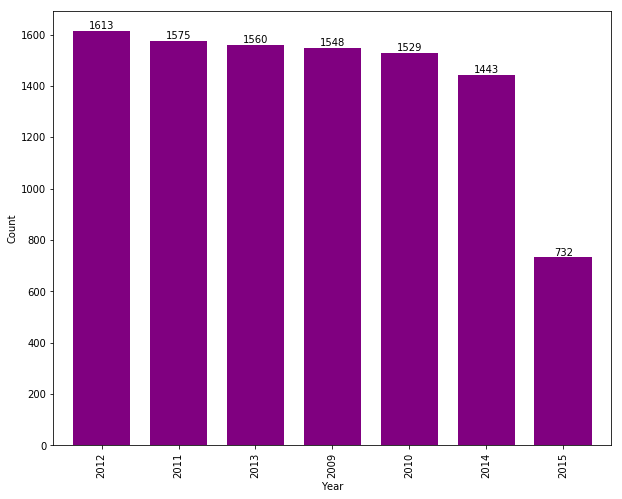

In [46]:
#Function to create histograms
import matplotlib.pyplot as plt
def plot_shit(column):
    year_hist = df_sample[column].value_counts().plot(kind = 'bar', width = 0.75, color= 'purple', figsize=(10,8))
    #print( df_sample[column].value_counts())
    plt.xlabel(column.title())
    plt.ylabel('Count')
    #x_years = df_sample['year'].sort_values().unique()
    #year_hist.set_xticklabels(labels=x_years, rotation=45, ha='right')
    for p in year_hist.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        label = y_value
        year_hist.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, 10),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='top',                # Vertically center label
            ha='center')
    return None
plot_shit('year')

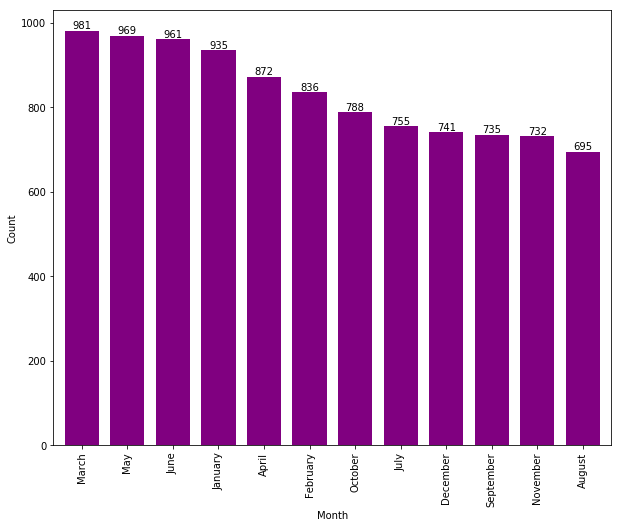

In [47]:
#Month hist
plot_shit('month')      

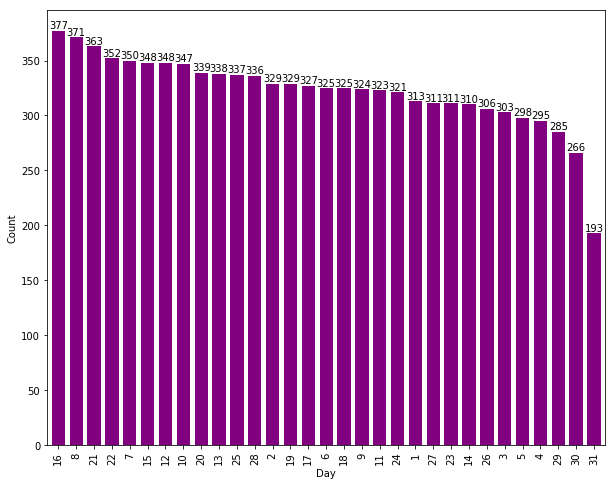

In [48]:
plot_shit('day')

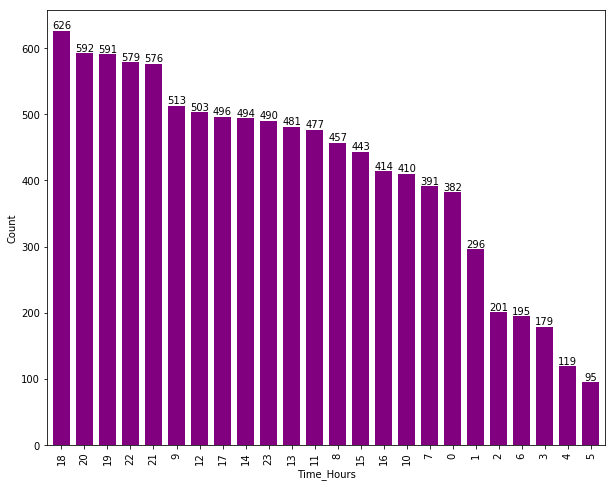

In [49]:
plot_shit('time_hours')

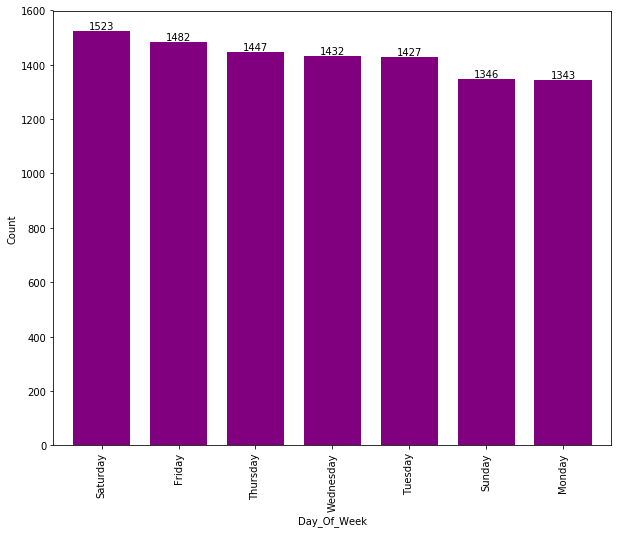

In [56]:
plot_shit('day_of_week')

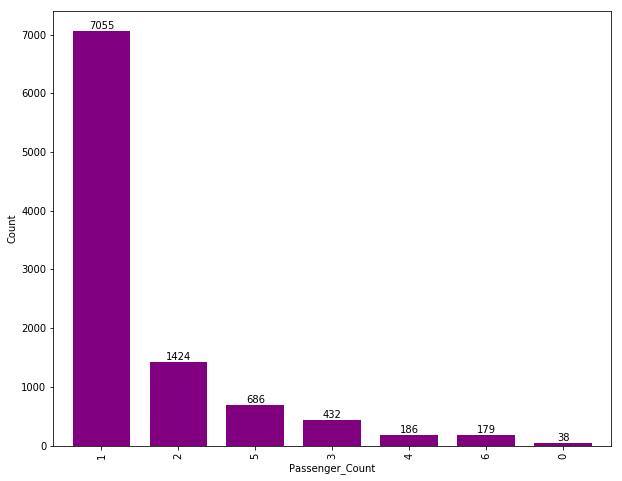

In [59]:
plot_shit('passenger_count')

In [72]:
#Print all sample where passenger count is 0
df_sample.loc[lambda df:df['passenger_count']==0]
#Remove rows where passenger count is 0
df_sample.drop(df_sample.loc[lambda df:df['passenger_count']==0].index, inplace=True)

In [73]:
#Print all sample where fare amount is negative
df_sample.loc[lambda df:df['fare_amount']<0 ]
#Remove rows where amount is negative
df_sample.drop(df_sample.loc[lambda df:df['fare_amount']<0 ].index, inplace=True)